In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly
import plotly.graph_objs as go

In [3]:
data = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

In [4]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
print('Then number of rows are {}'.format(data.shape[0]) ,'and the number of columns are {}'.format(data.shape[1]))

Then number of rows are 303 and the number of columns are 14


In [20]:
#finding out the NaN values in each column
null_features = [feature for feature in data.columns if data[feature].isnull().sum()>1]
print('There are {} null features'.format(null_features))

There are [] null features


**As you can see there are no NaN features in this dataset.**

In [22]:
#checking for duplicate rows
data.duplicated().sum()

1

In [23]:
data.drop_duplicates(inplace=True)

In [31]:
s_0 = data.sex.value_counts()[0]  #sex 0 count
s_1 = data.sex.value_counts()[1]  #sex 1 count   
print('Sex 0 : ',s_0, 'Sex 1 : ',s_1)

Sex 0 :  96 Sex 1 :  206


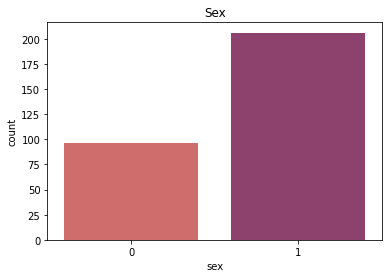

In [42]:
#plotting Sex 0 and Sex 1
sns.countplot(data=data, x="sex", palette="flare")
plt.title("Sex")
plt.show()

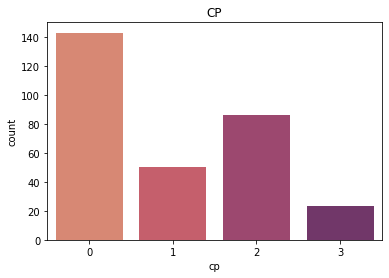

In [41]:
#plotting chest pain type
sns.countplot(data=data, x='cp', palette='flare')
plt.title("CP")
plt.show()

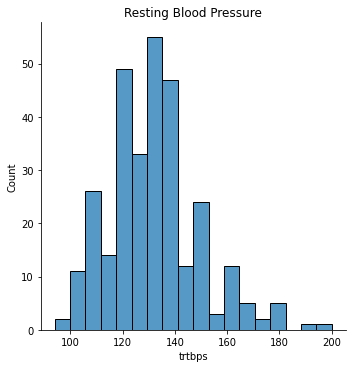

In [49]:
sns.displot(data=data, x='trtbps', palette='flare')
plt.title("Resting Blood Pressure")
plt.show()

**From this graph we can infer than few people have their trtbps at 200 mm Hg which is really high. Average is around 140 mm Hg.**

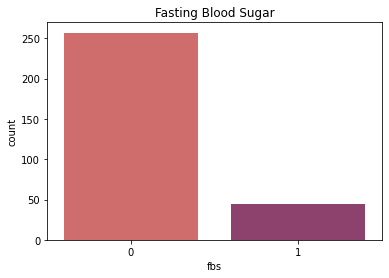

In [50]:
sns.countplot(data=data, x='fbs', palette='flare')
plt.title("Fasting Blood Sugar")
plt.show()

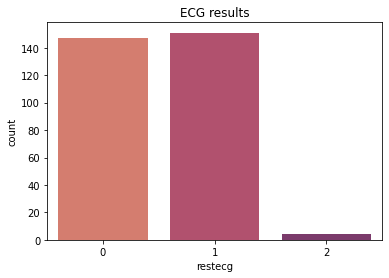

In [52]:
sns.countplot(data=data, x='restecg', palette='flare')
plt.title("ECG results")
plt.show()